# Titanic survival classification problem
- Download titanic dataset.
- Train a 2-layer NN with 5 neurons per layer (input/output apart) for 20 epochs and 64 batch size.
- Save the model.

## DL model

In [66]:
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
from keras import regularizers
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, accuracy_score,recall_score, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [67]:
# data load
dataset = sns.load_dataset("titanic")
dataframe, test_dataframe = ms.train_test_split(dataset, train_size=0.7, random_state=1)
dataframe.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
114,0,3,female,17.0,0,0,14.4583,C,Third,woman,False,NaN,Cherbourg,no,True
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
876,0,3,male,20.0,0,0,9.8458,S,Third,man,True,NaN,Southampton,no,True
674,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


In [68]:
print(dataframe['deck'].dtypes)
dataframe = dataframe.astype({"deck": str})
test_dataframe = test_dataframe.astype({"deck": str})
print(dataframe['deck'].dtypes)

category
object


In [69]:
# data processing
for i in dataframe.index:
    if dataframe['deck'][i] == 'nan':
        dataframe['deck'][i] = 'Z'

for i in test_dataframe.index:
    if test_dataframe['deck'][i] == 'nan':
        test_dataframe['deck'][i] = 'Z'

train_median = dataframe['age'].median()
for i in dataframe.index:
    if dataframe['age'][i] != dataframe['age'][i]:
        dataframe['age'][i] = train_median

train_median = test_dataframe['age'].median()
for i in test_dataframe.index:
    if test_dataframe['age'][i] != test_dataframe['age'][i]:
        test_dataframe['age'][i] = train_median

X = dataframe[['sex', 'pclass', 'age', 'deck']]
y = dataframe[['alive']]
X_ts = test_dataframe[['sex', 'pclass', 'age', 'deck']]
y_ts = test_dataframe[['alive']]
X_ts.head(10)

,sex,pclass,age,deck
862,female,1,48.0,D
223,male,3,28.0,Z
84,female,2,17.0,Z
680,female,3,28.0,Z
535,female,2,7.0,Z
623,male,3,21.0,Z
148,male,2,36.5,F
3,female,1,35.0,C
34,male,1,28.0,Z
241,female,3,28.0,Z


In [70]:
# normalization
normalization = [X['age'].mean(), X['age'].std()]
print("Age normalization --> " + str(normalization))

X['age'] = (X['age'] - normalization[0]) / normalization[1]
X_ts['age'] = (X_ts['age'] - normalization[0]) / normalization[1]

X_dum = pd.get_dummies(X)
X_ts_dum = pd.get_dummies(X_ts)

Age normalization --> [29.81099518459069, 13.283963797935623]


In [71]:
# dummification
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
y = integer_encoded.reshape(len(integer_encoded), 1)
integer_encoded_ts = label_encoder.fit_transform(y_ts)
y_ts = integer_encoded_ts.reshape(len(integer_encoded_ts), 1)

In [72]:
opt = Adam(learning_rate=0.01)

# model definition
input = Input(len(X_dum.columns))
layer_1 = Dense(5, activation='relu')(input)
layer_2 = Dense(5, activation='relu')(layer_1)
output = Dense(1, activation='sigmoid')(layer_2)

model = Model(input, output)
model.compile(loss='binary_crossentropy',
          optimizer=opt,
          metrics=['accuracy'])
model.summary()

# alternative model
# reg = regularizers.l2(0.01)
# model = Sequential()
# model.add(Input(shape=(14,), name='Input'))
# model.add(Dense(16, activation='relu', kernel_regularizer=reg))
# model.add(Dropout(0.25))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 65        
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [73]:
hist=model.fit(X_dum, 
               y,
               batch_size=64,
               epochs=8,
               validation_split=0.1,
               shuffle=True)

Epoch 1/8
9/9 [==============================] - 0s 10ms/step - loss: 0.7343 - accuracy: 0.3696 - val_loss: 0.7112 - val_accuracy: 0.2540
Epoch 2/8
9/9 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6411 - val_loss: 0.6656 - val_accuracy: 0.6825
Epoch 3/8
9/9 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.6446 - val_loss: 0.6310 - val_accuracy: 0.6825
Epoch 4/8
9/9 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6714 - val_loss: 0.5758 - val_accuracy: 0.7460
Epoch 5/8
9/9 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7321 - val_loss: 0.5304 - val_accuracy: 0.7778
Epoch 6/8
9/9 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.8268 - val_loss: 0.5132 - val_accuracy: 0.7302
Epoch 7/8
9/9 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8179 - val_loss: 0.5075 - val_accuracy: 0.7302
Epoch 8/8
9/9 [=========================

In [74]:
model.save("titanic_DeepLearn_model")

INFO:tensorflow:Assets written to: titanic_DeepLearn_model/assets


In [75]:
# hist.history.keys()

In [76]:
probabilities = model.predict(X_ts_dum)
fpr, tpr, _ = roc_curve(y_ts, probabilities)
print("Max ROC:")
print(auc(fpr, tpr))

predictions = np.where(probabilities > .5, 1, 0)
print("\nConfusion matrix:")
print(confusion_matrix(y_true=y_ts, y_pred=predictions))

Max ROC:
0.8078147200909349

Confusion matrix:
[[128  25]
 [ 37  78]]


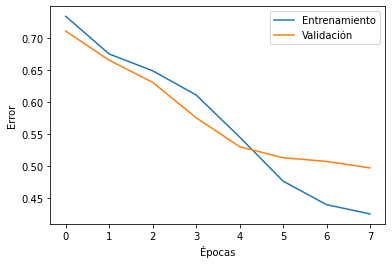

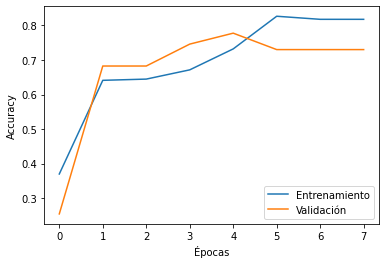

In [77]:
def plot_curves(history):
  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Entrenamiento', 'Validación'])

  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Entrenamiento', 'Validación'], loc='lower right')

plot_curves(hist.history)

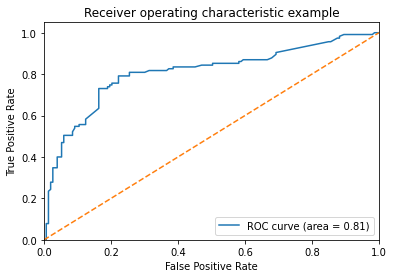

In [78]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()